# Scale-wise accuracy

author: steeve.laquitaine@epfl.ch  
date:  
last modified:  21.10.2023

## Setup

activate `npx_10m_384ch_unit_classes`

In [1]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os
import numpy as np
from matplotlib import pyplot as plt

# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/sfn_2023"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config
from src.nodes.postpro.accuracy import get_sorting_accuracies

# npx384 - 1 col
EXPERIMENT = "silico_neuropixels"
SIMULATION_DATE = "2023_10_18"
data_conf_1col, param_conf_1col = get_config(EXPERIMENT, SIMULATION_DATE).values()
GT_SORTING_PATH_1col = data_conf_1col["sorting"]["simulation"]["ground_truth"]["output"]
KS3_SORTING_PATH_1col = data_conf_1col["sorting"]["sorters"]["kilosort3"]["output"]

# npx-384 - 7 cols
EXPERIMENT = "silico_neuropixels"
SIMULATION_DATE = "2023_08_17"
data_conf_7cols, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()
KS3_SORTING_PATH_7cols = data_conf_7cols["sorting"]["sorters"]["kilosort3"]["output"]
GT_SORTING_PATH_7cols = data_conf_7cols["sorting"]["simulation"]["ground_truth"]["output"]

2023-10-23 10:53:41,344 - root - utils.py - get_config - INFO - Reading experiment config.
2023-10-23 10:53:41,393 - root - utils.py - get_config - INFO - Reading experiment config. - done
2023-10-23 10:53:41,394 - root - utils.py - get_config - INFO - Reading experiment config.
2023-10-23 10:53:41,462 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Compute (16 min)

In [2]:
# takes 44 min

# get 1 col accuracies
accuracies_1col = get_sorting_accuracies(GT_SORTING_PATH_1col, KS3_SORTING_PATH_1col)
acc_array_1col = np.array(accuracies_1col)

# get 7 cols accuracies
accuracies_7cols = get_sorting_accuracies(GT_SORTING_PATH_7cols, KS3_SORTING_PATH_7cols)
acc_array_7cols = np.array(accuracies_7cols)

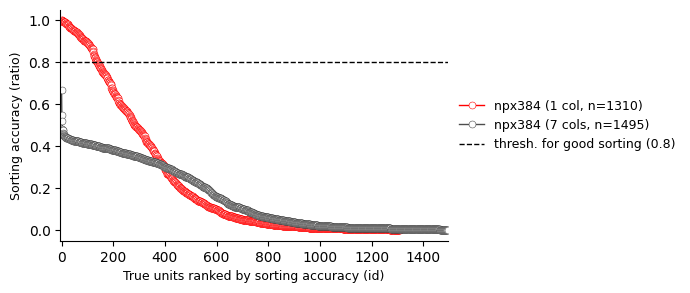

In [7]:
MARKERSIZE = 5

# count units
n_units = max([len(accuracies_1col), len(accuracies_7cols)])

# plot
fig, axis = plt.subplots(1,1,figsize=(5,3))
axis.plot(acc_array_1col, label=f"npx384 (1 col, n={len(acc_array_1col)})", marker="o", markerfacecolor="w", markeredgecolor=[1,0,0], color=[1,0,0], linestyle="-", markersize=MARKERSIZE, markeredgewidth=0.4, linewidth=1);
axis.plot(acc_array_7cols, label=f"npx384 (7 cols, n={len(acc_array_7cols)})", marker="o", markerfacecolor="w", markeredgecolor=[.3,.3,.3], color=[.3,.3,.3], linestyle="-", markersize=MARKERSIZE, markeredgewidth=0.4, linewidth=1);

# add legend
axis.spines[["right", "top"]].set_visible(False);
axis.set_ylabel("Sorting accuracy (ratio)", fontsize=9);
axis.set_xlabel("True units ranked by sorting accuracy (id)", fontsize=9);
axis.set_xlim([-5, n_units]);
axis.hlines(y=0.8, xmin=0, xmax=n_units, linestyle="--", color="k", linewidth=1, label="thresh. for good sorting (0.8)");
axis.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9);
#axis.set_yscale("log")

# save figures
plt.savefig("figures/4_controls/pdf/scale_wise_accuracy.pdf")
plt.savefig("figures/4_controls/svg/scale_wise_accuracy.svg")

### Detected units

In [4]:
# Good detection threshold
DET_THRESH = 0.8

In [5]:
print("Well detected units for npx384, 1 col (id):", accuracies_1col[accuracies_1col >= DET_THRESH].index.tolist())
print("Number of well detected units:", sum(acc_array_1col >= DET_THRESH))
print("accuracy:", len(acc_array_1col[acc_array_1col >= DET_THRESH])/len(acc_array_1col))

Well detected units for npx384, 1 col (id): [236454, 2148124, 3514704, 891776, 1981516, 1852927, 1855885, 691727, 499827, 3699020, 1736462, 3891529, 2870817, 1864097, 2536998, 785113, 1860371, 1921418, 1367812, 2145865, 2061088, 1808832, 141668, 2639635, 2323761, 1912824, 1664728, 2863830, 2008365, 3936308, 1782313, 2205117, 2219300, 2892132, 1047815, 2203846, 684054, 2795437, 2473130, 2173940, 2076919, 1407814, 4068988, 4068360, 4006002, 2099479, 3743596, 1684667, 739303, 2015083, 3783050, 1469180, 1775186, 1425768, 505734, 2065572, 1813372, 3443482, 1527208, 1942643, 582918, 1916639, 1797892, 1368911, 1965751, 2401194, 1878074, 3050647, 710717, 281388, 2075781, 1860823, 1885202, 3670248, 1811293, 3517481, 1858700, 1958413, 39973, 2191079, 3800792, 2050137, 533615, 4001779, 4111550, 1972346, 4066356, 4094711, 2096886, 1972603, 3597652, 3916330, 4190026, 3450833, 1964085, 3619329, 2104770, 841273, 3575741, 858861, 4108309, 1766796, 2083630, 3951208, 3993908, 1829418, 1949894, 703841, 1

In [6]:
print("Well detected units for npx384, 7 cols (id):", accuracies_7cols[accuracies_7cols >= DET_THRESH].index.tolist())
print("accuracy:", len(acc_array_7cols[acc_array_7cols >= DET_THRESH])/len(acc_array_7cols))

Well detected units for npx384, 7 cols (id): []
accuracy: 0.0
